Name: Siddharth Byale

Github username : sidb98

USC ID : 5284615575

## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score

## Reading Data

In [2]:
df = pd.read_csv('../../data/vertebral_column_data/column_2C.dat',header=None,delimiter=r"\s+")
df.columns = ['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle','sacral slope','pelvic radius','grade of spondylolisthesis','label']
new_label = {"label": {"AB": 1, "NO": 0}}
df.replace(new_label , inplace = True)
#print(df.shape)
df.head(10)

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
5,40.25,13.92,25.12,26.33,130.33,2.23,1
6,53.43,15.86,37.17,37.57,120.57,5.99,1
7,45.37,10.76,29.04,34.61,117.27,-10.68,1
8,43.79,13.53,42.69,30.26,125.00,13.29,1
9,36.69,5.01,41.95,31.68,84.24,0.66,1


## b) i) Pair plot of Independent Variable

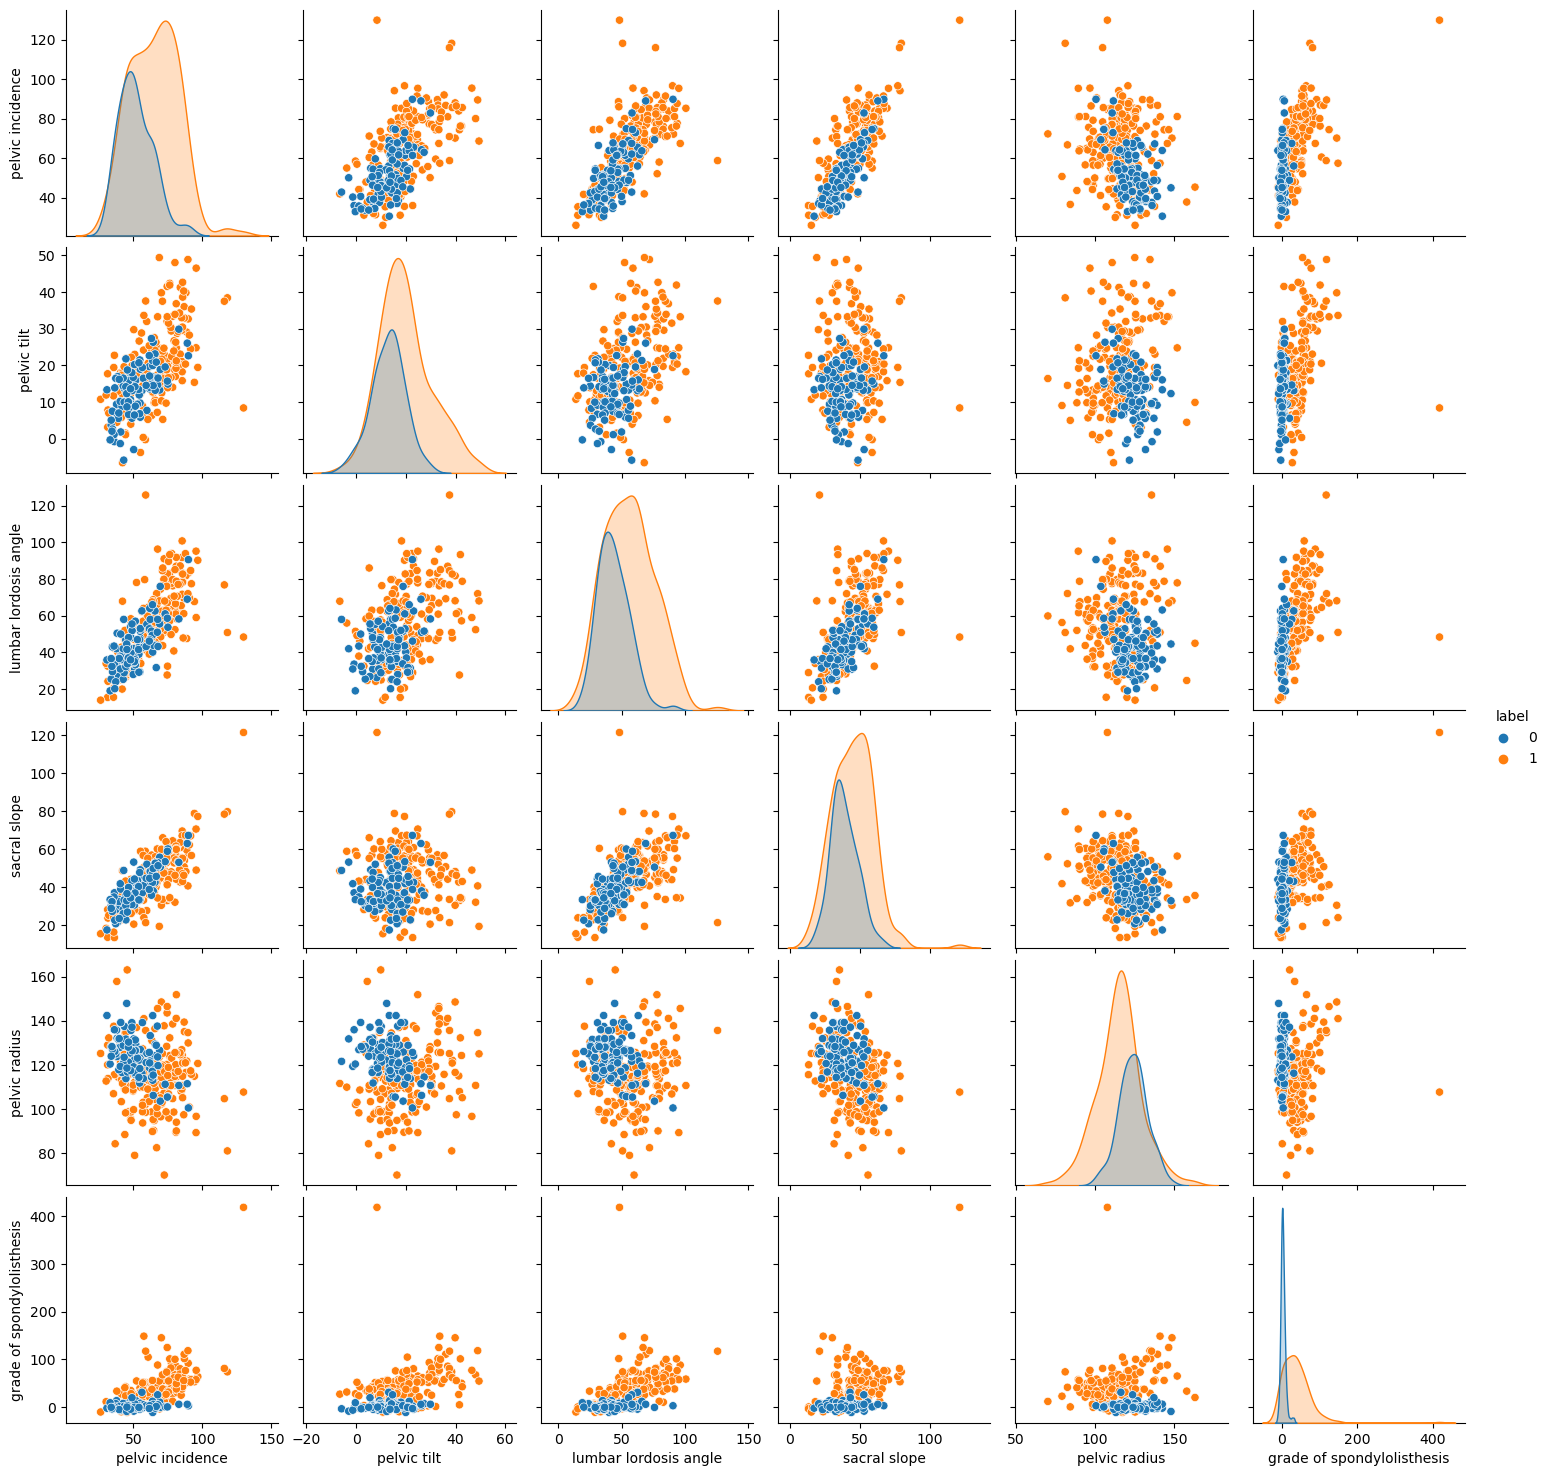

In [3]:
sns.pairplot(df,hue='label')

## b) ii) Box Plot

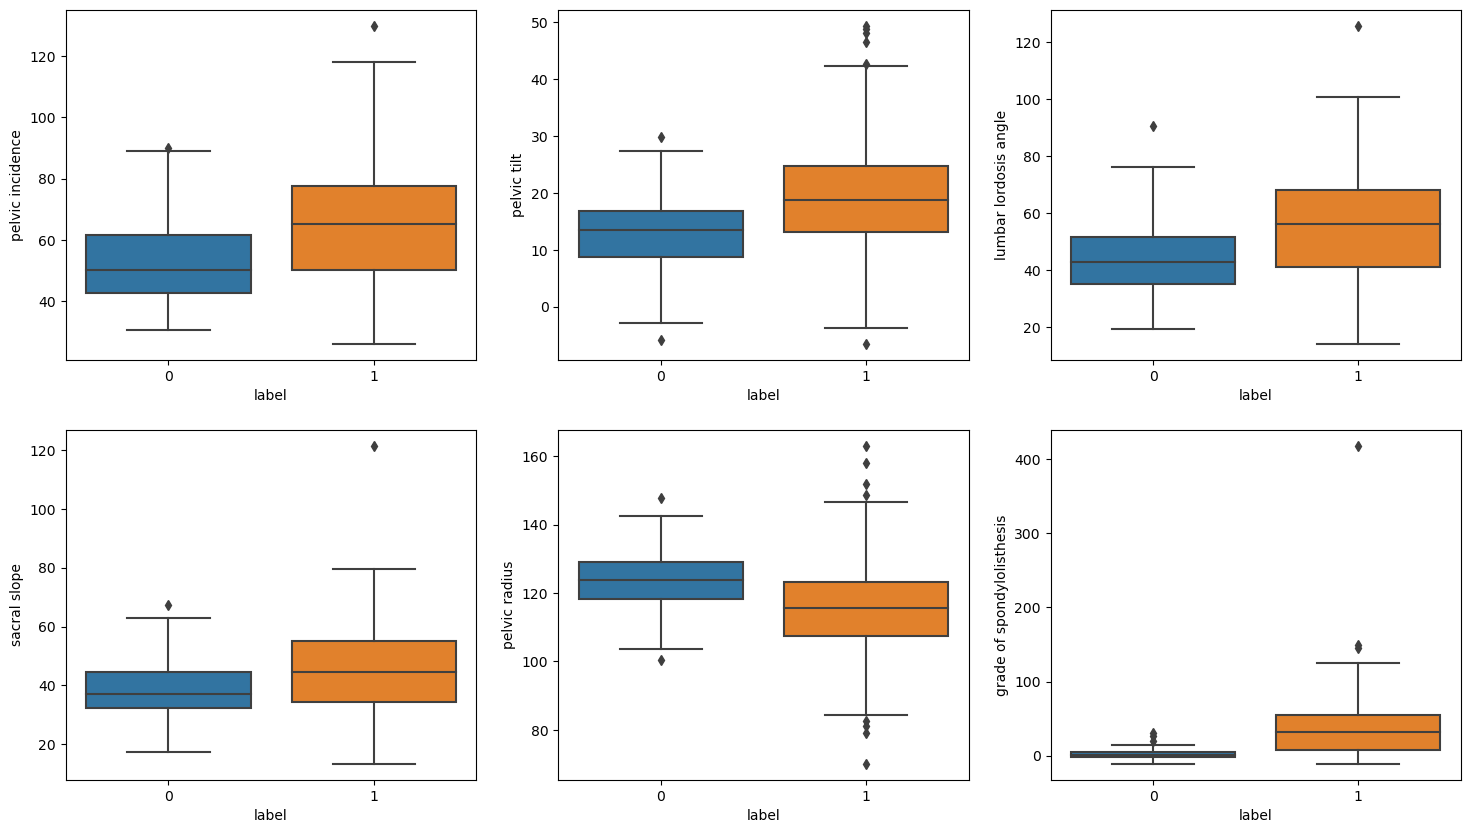

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(18,10))
sns.boxplot(ax =ax[0,0],data=df, x="label", y="pelvic incidence")
sns.boxplot(ax =ax[0,1],data=df, x="label", y="pelvic tilt")
sns.boxplot(ax =ax[0,2],data=df, x="label", y="lumbar lordosis angle")
sns.boxplot(ax =ax[1,0],data=df, x="label", y="sacral slope")
sns.boxplot(ax =ax[1,1],data=df, x="label", y="pelvic radius")
sns.boxplot(ax =ax[1,2],data=df, x="label", y="grade of spondylolisthesis")
plt.show()

## b) iii) Splitting into Train and Test data

In [5]:
df_no = df[df['label']==0]
df_ab = df[df['label']==1]

train_frame = [df_no.iloc[:70],df_ab.iloc[:140]]
test_frame = [df_no.iloc[70:], df_ab.iloc[140:]]

df_train = pd.concat(train_frame, ignore_index=True)
df_test = pd.concat(test_frame, ignore_index=True)


## c) i) ii) K- Nearest Neighbours

In [6]:
k_neigh_3 = [i for i in range(208,0,-3)]

#With Euclidean Metric
classifier = KNeighborsClassifier(metric='minkowski')
X_train, y_train = df_train.iloc[:,0:6], df_train.iloc[:,-1]
X_test, y_test = df_test.iloc[:,0:6], df_test.iloc[:,-1]

train_error_list = []
test_error_list = []

for k in k_neigh_3:
    classifier.n_neighbors = k
    classifier.fit(X_train, y_train)
    train_error=1-classifier.score(X_train,y_train)
    test_error=1-classifier.score(X_test,y_test)
    train_error_list.append(train_error)
    test_error_list.append(test_error)

least_error_idx = test_error_list.index(min(test_error_list))
k_star = k_neigh_3[least_error_idx]

print("Min Test Error:",min(test_error_list))
print("K*:",k_star)

Min Test Error: 0.06000000000000005
K*: 4


Text(0.5, 1.0, 'Error Under Varying K Values')

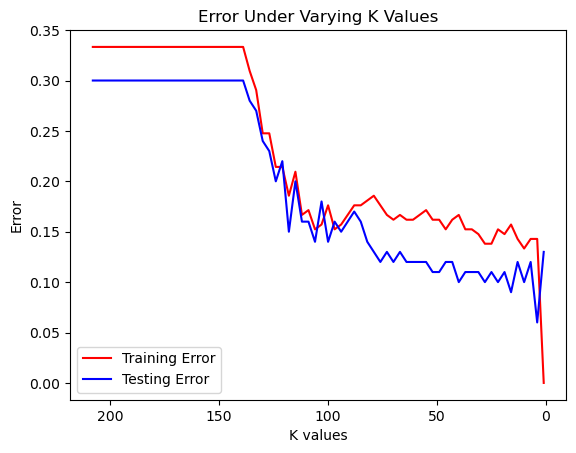

In [7]:
plt.plot(k_neigh_3,train_error_list, color='red',label='Training Error')
plt.plot(k_neigh_3,test_error_list, color='blue',label='Testing Error')
plt.xlabel('K values')
plt.ylabel('Error')
plt.gca().invert_xaxis()
plt.legend(loc="lower left")
plt.title('Error Under Varying K Values') 

True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1 score: 0.9583333333333333


Text(0.5, 1.0, 'Confusion Matrix')

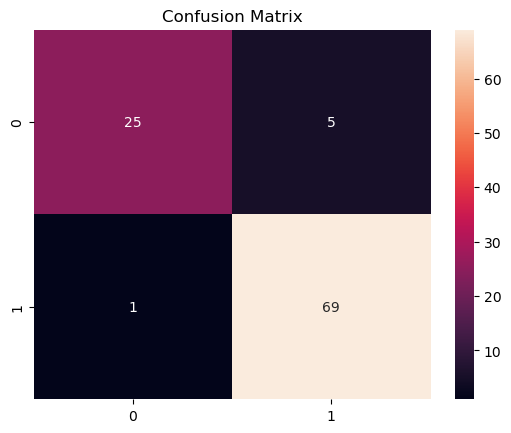

In [8]:
# confusion matrix, true positive rate, true negative rate, precision, and F1-score


classifier = KNeighborsClassifier(n_neighbors=k_star, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

conf_mat = confusion_matrix(y_test,y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

tn = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tp = conf_mat[1][1]

tpr = tp/(tp+fn)
tnr = tn/(tn+fp)


print("True Positive Rate:", tpr)
print("True Negative Rate:",tnr)
print("Precision:",precision)
print("F1 score:",f1)

ax = plt.axes()
sns.heatmap(data=conf_mat, annot=True, ax=ax)
ax.set_title("Confusion Matrix")

## c) iii) Plotting Learning Curve

Text(0.5, 1.0, 'Learning Curve')

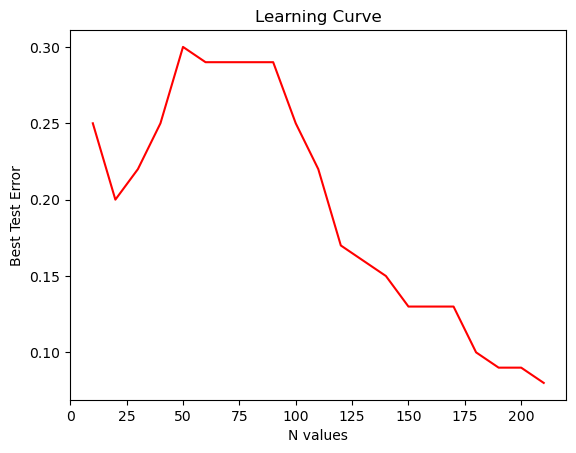

In [9]:


n_size = {}
for i in range(10,211,10):
    n_size[i] = []

classifier = KNeighborsClassifier(metric='minkowski')

for N in range(10,211,10):
    var_train_frame = [df_no.iloc[:math.floor((N/3))],df_ab.iloc[:N-math.floor((N/3))]]
    #print("Var_train_size",var_train_frame[0].shape, var_train_frame[1].shape)
    var_df_train = pd.concat(var_train_frame)
    var_X_train, var_y_train = var_df_train.iloc[:,0:6], var_df_train.iloc[:,-1]
    #print(var_X_train.shape, var_y_train.shape)


    min_test_error = float('inf')
    for k in range(1,N+1,5):
        classifier.n_neighbors = k
        classifier.fit(var_X_train, var_y_train)
        var_test_error=1-classifier.score(X_test,y_test)
        if var_test_error < min_test_error:
            k_star = k
            min_test_error = var_test_error
            
    n_size[N].extend([k_star, min_test_error])

    
N = []
N_test_error = []
for key, value in  n_size.items():
    N.append(key)
    N_test_error.append(value[1])

plt.plot(N,N_test_error, color='red',label='Best Error Rate')
plt.xlabel('N values')
plt.ylabel('Best Test Error')
plt.title('Learning Curve') 

## d) Variation of KNN

In [10]:
k_neigh_5 = [i for i in range(1,200,5)]
X_train, y_train = df_train.iloc[:,0:6], df_train.iloc[:,-1]
X_test, y_test = df_test.iloc[:,0:6], df_test.iloc[:,-1]

error_df = pd.DataFrame(columns = ['Distance', 'Best Error Rate', 'K*', "log10(p)"])

i) A) Manhattan Distance

In [11]:
#With Manhattan Metric
classifier = KNeighborsClassifier(metric='manhattan')

test_error_list = []
min_test_error = float('inf')

for k in k_neigh_5:
    classifier.n_neighbors = k
    classifier.fit(X_train, y_train)
    test_error=1-classifier.score(X_test,y_test)
    test_error_list.append(test_error)

    if test_error < min_test_error:
        k_star = k
        min_test_error = test_error

error_df = error_df.append({'Distance': 'Manhattan', 'Best Error Rate':min_test_error, 'K*':k_star}, ignore_index=True)

print("Manhattan Distance")
print("Mininum Test Error:", min_test_error)
print("K*:", k_star)


Manhattan Distance
Mininum Test Error: 0.10999999999999999
K*: 6


i) B) $Log_{10}$(p) Distance

In [12]:
p_list =10**np.arange(0.1,1.1,0.1)


test_error_list = []
min_test_error = float('inf')

for p_val in p_list:
    classifier = KNeighborsClassifier(n_neighbors=6 ,metric='minkowski', p=p_val)
    classifier.fit(X_train, y_train)
    test_error=1-classifier.score(X_test,y_test)
    test_error_list.append(test_error)

    if test_error < min_test_error:
        p_star = p_val
        min_test_error = test_error

error_df = error_df.append({'Distance': 'Log10(p)', 'Best Error Rate':min_test_error, 'log10(p)': math.log10(p_star)}, ignore_index=True)


print("Log10(p) Distance")
print("Mininum Test Error:", min_test_error)
print("Value of log10(p):", math.log10(p_star))

Log10(p) Distance
Mininum Test Error: 0.06000000000000005
Value of log10(p): 0.6


i) C) Chebyshev Distance


In [13]:
#Chebyshev Distance
classifier = KNeighborsClassifier(metric='chebyshev')

test_error_list = []
min_test_error = float('inf')

for k in k_neigh_5:
    classifier.n_neighbors = k
    classifier.fit(X_train, y_train)
    test_error=1-classifier.score(X_test,y_test)
    test_error_list.append(test_error)

    if test_error < min_test_error:
        k_star = k
        min_test_error = test_error
error_df = error_df.append({'Distance': 'Chebyshev', 'Best Error Rate':min_test_error, 'K*':k_star}, ignore_index=True)


print("Chebyshev Distance")
print("Mininum Test Error:", min_test_error)
print("K*:", k_star)

Chebyshev Distance
Mininum Test Error: 0.07999999999999996
K*: 16


ii) Mahalanobis Distance 

In [14]:
#Mahalanobis Distance
classifier = KNeighborsClassifier(metric='mahalanobis', metric_params={'VI':np.linalg.pinv(np.cov(X_train,rowvar=False))})

test_error_list = []
min_test_error = float('inf')

for k in k_neigh_5:
    classifier.n_neighbors = k
    classifier.fit(X_train, y_train)
    test_error=1-classifier.score(X_test,y_test)
    test_error_list.append(test_error)

    if test_error < min_test_error:
        k_star = k
        min_test_error = test_error

error_df = error_df.append({'Distance': 'Mahalanobis', 'Best Error Rate':min_test_error, 'K*':k_star}, ignore_index=True)

        
print("Mahalanobis Distance")
print("Mininum Test Error:", min_test_error)
print("K*:", k_star)

Mahalanobis Distance
Mininum Test Error: 0.17000000000000004
K*: 1


In [15]:
print(error_df)

      Distance  Best Error Rate   K*  log10(p)
0    Manhattan             0.11    6       NaN
1     Log10(p)             0.06  NaN       0.6
2    Chebyshev             0.08   16       NaN
3  Mahalanobis             0.17    1       NaN


## e) Weighted Voting

In [16]:
k_neigh_5 = [i for i in range(1,200,5)]
X_train, y_train = df_train.iloc[:,0:6], df_train.iloc[:,-1]
X_test, y_test = df_test.iloc[:,0:6], df_test.iloc[:,-1]

error_df = pd.DataFrame(columns = ['Distance', 'Best Error Rate', 'K*'])


Euclidean Distance

In [17]:
classifier = KNeighborsClassifier(metric='minkowski', weights='distance')
test_error_list = []

for k in k_neigh_5:
    classifier.n_neighbors = k
    classifier.fit(X_train, y_train)
    test_error = 1 - classifier.score(X_test,y_test)
    test_error_list.append(test_error)

least_error_idx = test_error_list.index(min(test_error_list))


print("For Euclidean Distance")
print("Min Test Error:",min(test_error_list),"\nK*:", k_neigh_5[least_error_idx])

error_df = error_df.append({'Distance': 'Euclidean', 'Best Error Rate':min(test_error_list), 
'K*':k_neigh_5[least_error_idx]}, ignore_index=True)



For Euclidean Distance
Min Test Error: 0.09999999999999998 
K*: 6


Manhattan Distance

In [18]:
classifier = KNeighborsClassifier(metric='manhattan', weights='distance')
test_error_list = []

for k in k_neigh_5:
    classifier.n_neighbors = k
    classifier.fit(X_train, y_train)
    test_error = 1 - classifier.score(X_test,y_test)
    test_error_list.append(test_error)

least_error_idx = test_error_list.index(min(test_error_list))
print("For Manhattan Distance")
print("Min Test Error:",min(test_error_list),"\nK*:", k_neigh_5[least_error_idx])

error_df = error_df.append({'Distance': 'Manhattan', 'Best Error Rate':min(test_error_list), 
'K*':k_neigh_5[least_error_idx]}, ignore_index=True)

For Manhattan Distance
Min Test Error: 0.09999999999999998 
K*: 26


Chebyshev Distance

In [19]:
classifier = KNeighborsClassifier(metric='chebyshev', weights='distance')
test_error_list = []

for k in k_neigh_5:
    classifier.n_neighbors = k
    classifier.fit(X_train, y_train)
    test_error = 1 - classifier.score(X_test,y_test)
    test_error_list.append(test_error)

least_error_idx = test_error_list.index(min(test_error_list))
print("For Chebyshev Distance")
print("Min Test Error:",min(test_error_list),"\nK*:", k_neigh_5[least_error_idx])

error_df = error_df.append({'Distance': 'Chebyshev', 'Best Error Rate':min(test_error_list), 
'K*':k_neigh_5[least_error_idx]}, ignore_index=True)

For Chebyshev Distance
Min Test Error: 0.10999999999999999 
K*: 16


Printing Best Error Rate for all Distances

In [20]:
print(error_df)

    Distance  Best Error Rate  K*
0  Euclidean             0.10   6
1  Manhattan             0.10  26
2  Chebyshev             0.11  16


f) What is the lowest training error rate you achieved in this homework?

ANS) Lowest training error rate achieved was 0, when k=1

## Refrences

https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

https://stackoverflow.com/questions/66833728/boxplots-with-seaborn-for-all-variables-in-a-dataset-at-once

https://www.statology.org/seaborn-figure-size

https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-and-axis-labels-to-seaborn-heatmap

https://stackoverflow.com/questions/70263897/convert-categorical-values-to-custom-number-in-pandas-dataframe

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://stackoverflow.com/questions/52687493/find-the-training-and-test-error-in-my-self-implemented-knn-algorithm

https://numpy.org/doc/stable/reference/generated/numpy.arange.html

https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics/34650347#a

https://stackoverflow.com/questions/59862791/knn-mahalanobis-error-size-of-v-does-not-match-python

https://stackoverflow.com/questions/21638895/inverse-of-a-matrix-using-numpy

https://www.geeksforgeeks.org/how-to-create-an-empty-dataframe-and-append-rows-columns-to-it-in-pandas/